<a href="https://colab.research.google.com/github/k1151msarandega/QuCode-21-Days-of-Quantum-Challenge-Diary/blob/main/Day11_Quantum_Entanglement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Day 11 — Quantum Entanglement

> _QuCode 21 Days of Quantum Challenge — Learning notebook_
>
> **Date:** 2025-09-011  
> **Author:** Kudzai Musarandega  
> **Tags:** quantum, learning, challenge, day-11  
> **Focus:** Bell states, EPR paradox, Non-locality
>
> **Learning objectives**
> - **Write** the four **Bell states** and build them from simple gates (H + CNOT).
> - **Explain** the **EPR paradox** (local realism vs. quantum predictions).
> - **Compute** and **simulate** a **CHSH** Bell test and see a violation (target \(S=2\sqrt{2}\)).
> - **Distinguish** entanglement from signalling (why violations don't enable FTL comms).

>
> **Key takeaways (summary-first)**
> - Bullet 1
> - Bullet 2
> - Bullet 3


## Resources
- **Official/Assigned:**
    - [EPR Paradox: EASY Quantum Mechanics VISUALISED, Why Einstein HATED Spooky Action At A Distance by Parth G](https://www.youtube.com/watch?v=fBR5HQ-Ja10)
    - [Bell's Inequality-The weirdest theorem in the world by Qiskit](https://www.youtube.com/watch?v=9OM0jSTeeBg)
    - [The EPR Paradox & Bell's inequality explained simply by Arvin Ash](https://www.youtube.com/watch?v=f72whGQ31Wg)
- **Extra reading:**
    - [Quantum Entanglement & Spooky Action at a Distance by Veritasium](https://www.youtube.com/watch?v=ZuvK-od647c)
- **Original notes:**


In [2]:
# %% [markdown]
# ### Environment setup (Colab)
# If you are running on Colab for the first time today, uncomment to install.
# This cell intentionally avoids heavy installs by default.
#
# !pip -q install qiskit pennylane matplotlib numpy

import sys, platform, math, json, numpy as np

print("Python:", sys.version.split()[0])
print("Platform:", platform.platform())
np.random.seed(42)


Python: 3.12.11
Platform: Linux-6.1.123+-x86_64-with-glibc2.35


## 1. Concepts in brief

- **Entanglement:** Two-qubit states can be **non-separable**; Bell states are maximally entangled.
- **Bell states:** Orthonormal basis of the 2-qubit space that exhibits perfect (anti)correlations.
- **EPR paradox:** Tension between **locality** (no faster-than-light influence) and **realism** (pre-existing values).
- **Bell/CHSH inequality:** Any **local realistic** theory obeys  
$$
|S| \leq 2
$$  
while quantum mechanics can reach  
$$
2\sqrt{2}.
$$
- **No-signalling:** Despite strong correlations, each party’s local outcomes are uniformly random (no FTL communication).

## 2. Bell states & circuits

The four maximally entangled 2-qubit states:
$$
\begin{aligned}
\lvert\Phi^{\pm}\rangle &= \tfrac{1}{\sqrt{2}}\big(\lvert 00\rangle \pm \lvert 11\rangle\big),\\
\lvert\Psi^{\pm}\rangle &= \tfrac{1}{\sqrt{2}}\big(\lvert 01\rangle \pm \lvert 10\rangle\big).
\end{aligned}
$$

**Circuit to create \( \lvert\Phi^+\rangle \)** from \( \lvert 00\rangle \): apply **H** on qubit 0, then **CNOT** (control=0, target=1).

**Maximal entanglement check:** the reduced density matrix of each single qubit is maximally mixed:
$$
\rho_A=\rho_B=\tfrac{1}{2}\,I.
$$

In [3]:
# Bell states, reduced states = mixed?
import numpy as np

# basis |00>,|01>,|10>,|11>
zero = np.array([1,0], dtype=complex)
one  = np.array([0,1], dtype=complex)
basis = [np.kron(zero, zero), np.kron(zero, one), np.kron(one, zero), np.kron(one, one)]

# Bell states
Phi_plus  = (basis[0] + basis[3]) / np.sqrt(2)
Phi_minus = (basis[0] - basis[3]) / np.sqrt(2)
Psi_plus  = (basis[1] + basis[2]) / np.sqrt(2)
Psi_minus = (basis[1] - basis[2]) / np.sqrt(2)  # singlet

def density(psi):
    psi = psi.reshape(-1,1)
    return psi @ psi.conj().T

def partial_trace_AB_to_A(rho):
    # dimA=dimB=2
    rho = rho.reshape(2,2,2,2)
    # trace over B (indices 1 and 3)
    return np.einsum('ijjk->ik', rho)

def partial_trace_AB_to_B(rho):
    rho = rho.reshape(2,2,2,2)
    # trace over A (indices 0 and 2)
    return np.einsum('iijk->jk', rho)

I2 = np.eye(2)/2
for name, state in [('Phi+',Phi_plus), ('Phi-',Phi_minus), ('Psi+',Psi_plus), ('Psi-',Psi_minus)]:
    rho = density(state)
    rhoA = partial_trace_AB_to_A(rho)
    rhoB = partial_trace_AB_to_B(rho)
    print(f"{name} reduced states ~ I/2?")
    print("  ρA =", np.round(rhoA, 3))
    print("  ρB =", np.round(rhoB, 3))



Phi+ reduced states ~ I/2?
  ρA = [[0.5+0.j 0. +0.j]
 [0. +0.j 0.5+0.j]]
  ρB = [[1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j]]
Phi- reduced states ~ I/2?
  ρA = [[0.5+0.j 0. +0.j]
 [0. +0.j 0.5+0.j]]
  ρB = [[0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]]
Psi+ reduced states ~ I/2?
  ρA = [[0.5+0.j 0. +0.j]
 [0. +0.j 0.5+0.j]]
  ρB = [[0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]]
Psi- reduced states ~ I/2?
  ρA = [[-0.5+0.j  0. +0.j]
 [ 0. +0.j -0.5+0.j]]
  ρB = [[0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]]


## 3. EPR paradox (concept)
**Local realism** assumes two things:
- **Locality:** influences cannot propagate faster than light.
- **Realism:** measurement outcomes reflect **pre-existing** values.

EPR argued entangled pairs let you infer a distant outcome **instantaneously**, challenging locality or realism.  
**Bell/CHSH** showed: any **local realistic** model obeys a bound, but **quantum** predictions **violate** it.



## 4. Bell–CHSH inequality

Define two measurement settings for **Alice**: $$A_0, A_1$$ and for **Bob**: $$B_0, B_1,$$ each with outcomes $$\pm 1.$$

The **CHSH** parameter:
$$
S \;=\; E(A_0B_0) + E(A_0B_1) + E(A_1B_0) - E(A_1B_1),
$$
where $$E$$ is the correlation, $$E=\langle ab\rangle.$$

**Local realism bound:**
$$
|S| \le 2
$$

**Quantum (Tsirelson) bound:**
$$
|S| \le 2\sqrt{2}
$$

For the **singlet** state
$$\lvert\Psi^{-}\rangle,$$ measuring spin along unit vectors

$$
\mathbf{a},\mathbf{b}
$$

 gives
$$
E(\mathbf{a},\mathbf{b}) \;=\; -\,\mathbf{a}\cdot\mathbf{b}.
$$

Choosing coplanar directions
$$
\theta_{A_0}=0,\quad
\theta_{A_1}=\tfrac{\pi}{2},\quad
\theta_{B_0}=\tfrac{\pi}{4},\quad
\theta_{B_1}=-\tfrac{\pi}{4}.
$$

yields
$$
|S| = 2\sqrt{2}.
$$

In [4]:
# Analytic CHSH for singlet using E = -a·b with 2D angles
import numpy as np

def unit(theta):
    return np.array([np.cos(theta), np.sin(theta)])

def E_singlet(theta_a, theta_b):
    a, b = unit(theta_a), unit(theta_b)
    return -np.dot(a, b)

A0, A1 = 0.0, np.pi/2
B0, B1 = np.pi/4, -np.pi/4

S = (E_singlet(A0,B0) + E_singlet(A0,B1) +
     E_singlet(A1,B0) - E_singlet(A1,B1))
print("Analytic CHSH S =", S, "(expected 2√2 ≈", 2*np.sqrt(2), ")")


Analytic CHSH S = -2.8284271247461903 (expected 2√2 ≈ 2.8284271247461903 )


### 3.1 Monte-Carlo CHSH with joint probabilities
For the singlet, the **joint** probability for outcomes $$r,s\in\{\pm 1\}$$ at settings $$\mathbf{a},\mathbf{b}$$ is
$$P(r,s\mid \mathbf{a},\mathbf{b}) \;=\; \tfrac{1}{4}\big(1 - r\,s\,\mathbf{a}\cdot\mathbf{b}\big).$$
We can sample from this to estimate $$E$$ and $$S.$$


In [5]:
# Monte-Carlo sampler for joint outcomes on the singlet
rng = np.random.default_rng(1234)

def sample_joint(a_theta, b_theta, shots=10_000):
    a, b = unit(a_theta), unit(b_theta)
    c = np.dot(a,b)
    # outcomes list in fixed order: (r,s) = (+1,+1), (+1,-1), (-1,+1), (-1,-1)
    outcomes = np.array([[+1,+1],[+1,-1],[-1,+1],[-1,-1]])
    probs = 0.25*np.array([1 - (+1)*(+1)*c,
                           1 - (+1)*(-1)*c,
                           1 - (-1)*(+1)*c,
                           1 - (-1)*(-1)*c])
    # numerics guard
    probs = np.clip(probs, 0.0, 1.0)
    probs = probs/np.sum(probs)
    idx = rng.choice(4, size=shots, p=probs)
    rs = outcomes[idx]
    r, s = rs[:,0], rs[:,1]
    E = np.mean(r*s)
    return E

def estimate_CHSH(shots=20_000):
    E00 = sample_joint(A0,B0,shots)
    E01 = sample_joint(A0,B1,shots)
    E10 = sample_joint(A1,B0,shots)
    E11 = sample_joint(A1,B1,shots)
    S_hat = E00 + E01 + E10 - E11
    return S_hat, (E00,E01,E10,E11)

S_hat, Es = estimate_CHSH(shots=200_000)
print("Monte-Carlo CHSH S ≈", round(S_hat, 4), " (local ≤ 2, quantum ≤ 2√2 ≈", round(2*np.sqrt(2),4), ")")
print("E00, E01, E10, E11 ≈", [round(e,4) for e in Es])


Monte-Carlo CHSH S ≈ -2.8292  (local ≤ 2, quantum ≤ 2√2 ≈ 2.8284 )
E00, E01, E10, E11 ≈ [np.float64(-0.7087), np.float64(-0.7064), np.float64(-0.707), np.float64(0.7072)]


## 4) No-signalling (why this isn’t FTL)
Even though correlations violate local-realist bounds, each party’s **marginals** are always uniform:
$$
P(r\mid \mathbf{a})=\tfrac{1}{2},\qquad P(s\mid \mathbf{b})=\tfrac{1}{2}.
$$
Equivalently, the local statistics don’t depend on the other side’s setting:
$$
P(r\mid \mathbf{a},\mathbf{b})=P(r\mid \mathbf{a}),\qquad
P(s\mid \mathbf{a},\mathbf{b})=P(s\mid \mathbf{b}).
$$
So no information can be sent faster than light.

## 5) Key takeaways
- **Bell states** are maximally entangled; each subsystem is maximally mixed $$(\rho=\tfrac{1}{2}I).$$
- **EPR** highlighted tension between **locality** and **realism**; **Bell/CHSH** turned it into a testable inequality.
- **Experiments & our sim** violate $$ |S|\le 2 $$ and approach $$ 2\sqrt{2} ,$$ ruling out **local hidden variables**.
- **Entanglement ≠ signalling**: strong correlations, but local outcome distributions remain $$1/2,1/2.$$


## 6) Quick exercises
1. **Other Bell states:** repeat the CHSH analytic + Monte-Carlo for $$ \lvert\Phi^+\rangle $$ with the optimal axes in the $$x\!-\!z$$ plane.
2. **Visibility:** mix white noise: $$ \rho_v = v\,\lvert\Psi^-\rangle\langle\Psi^-| + (1-v)\,I/4 .$$

   Show numerically that $$S \approx 2\sqrt{2}\,v$$ and find the threshold $$v$$ where the violation disappears.

3. **No-signalling check:** verify numerically that $$P(r=+1\mid \mathbf{a})=1/2$$ for many $$\mathbf{b}.$$


In [7]:
import numpy as np

# Pauli matrices and identities
I2 = np.eye(2, dtype=complex)
sx = np.array([[0,1],[1,0]], dtype=complex)
sy = np.array([[0,-1j],[1j,0]], dtype=complex)
sz = np.array([[1,0],[0,-1]], dtype=complex)
paulis = np.array([sx, sy, sz], dtype=object)

def kron(*ops):
    """Kronecker product of a list of operators."""
    out = np.array([[1]], dtype=complex)
    for op in ops:
        out = np.kron(out, op)
    return out

def ket00():
    v = np.zeros((4,1), dtype=complex)
    v[0,0] = 1.0
    return v

def bell_phi_plus():
    # |Φ+> = (|00> + |11>)/√2
    v = np.zeros((4,1), dtype=complex)
    v[0,0] = 1/np.sqrt(2)
    v[3,0] = 1/np.sqrt(2)
    return v

def bell_psi_minus():
    # |Ψ-> = (|01> - |10|)/√2
    v = np.zeros((4,1), dtype=complex)
    v[1,0] = 1/np.sqrt(2)
    v[2,0] = -1/np.sqrt(2)
    return v

def rho_pure(ket):
    return ket @ ket.conj().T

def bloch_op(n):
    """Return observable n·σ with ||n||=1 for a single qubit."""
    n = np.asarray(n, dtype=float)
    return n[0]*sx + n[1]*sy + n[2]*sz

def proj(bloch_vec, outcome):
    """
    Projector Π_outcome for measuring along bloch_vec with outcome ∈ {+1,-1}:
    Π = (I + outcome * n·σ)/2
    """
    return 0.5*(I2 + outcome * bloch_op(bloch_vec))

def E_corr(rho, a, b):
    """
    Correlator E = ⟨(a·σ)⊗(b·σ)⟩ for 2-qubit state rho.
    """
    A = bloch_op(a)
    B = bloch_op(b)
    obs = kron(A, B)
    return np.real_if_close(np.trace(rho @ obs))

def CHSH_S(rho, A0, A1, B0, B1):
    """
    S = E(A0,B0) + E(A0,B1) + E(A1,B0) - E(A1,B1)
    """
    return (E_corr(rho, A0, B0) + E_corr(rho, A0, B1) +
            E_corr(rho, A1, B0) - E_corr(rho, A1, B1))

def normalize(v):
    v = np.asarray(v, dtype=float)
    n = np.linalg.norm(v)
    if n == 0:
        raise ValueError("Zero vector cannot be normalized.")
    return v / n

def rot_xz(theta):
    """
    Unit vector in the x–z plane making polar angle theta from +z toward +x.
    theta=0 -> +z ; theta=pi/2 -> +x.
    """
    return normalize([np.sin(theta), 0.0, np.cos(theta)])

rng = np.random.default_rng(123)


### Exercise 1: CHSH for $|\Phi^+\rangle$
Optimal axes in the $x\!-\!z$ plane:
- Alice: $A_0=\hat z$, $A_1=\hat x$
- Bob: $B_0=(\hat z+\hat x)/\sqrt{2}$, $B_1=(\hat z-\hat x)/\sqrt{2}$

In [8]:
# Compute S for |Φ+>
phi_plus = bell_phi_plus()
rho_phi = rho_pure(phi_plus)

A0 = rot_xz(0.0)            # +z
A1 = rot_xz(np.pi/2)        # +x
B0 = normalize([1,0,1])     # (x+z)/√2
B1 = normalize([-1,0,1])    # (-x+z)/√2

S_phi = CHSH_S(rho_phi, A0, A1, B0, B1)
print("S(|Φ+⟩) =", S_phi, "  |S| ≈", np.abs(S_phi))
print("2√2 ≈", 2*np.sqrt(2))


S(|Φ+⟩) = 2.828427124746189   |S| ≈ 2.828427124746189
2√2 ≈ 2.8284271247461903


### Exercise 2: Visibility with Werner noise
Singlet state mixed with white noise:
$$
\rho_v = v|\Psi^-\rangle\langle\Psi^-| + (1-v)\,I/4
$$
Prediction: $S \approx 2\sqrt{2}v$, violation lost when $v\le 1/\sqrt{2}$.

v=0.00  S≈0.0000   (2√2 v≈0.0000)
v=0.10  S≈-0.2828   (2√2 v≈0.2828)
v=0.20  S≈-0.5657   (2√2 v≈0.5657)
v=0.30  S≈-0.8485   (2√2 v≈0.8485)
v=0.40  S≈-1.1314   (2√2 v≈1.1314)
v=0.50  S≈-1.4142   (2√2 v≈1.4142)
v=0.60  S≈-1.6971   (2√2 v≈1.6971)
v=0.70  S≈-1.9799   (2√2 v≈1.9799)
v=0.80  S≈-2.2627   (2√2 v≈2.2627)
v=0.90  S≈-2.5456   (2√2 v≈2.5456)
v=1.00  S≈-2.8284   (2√2 v≈2.8284)


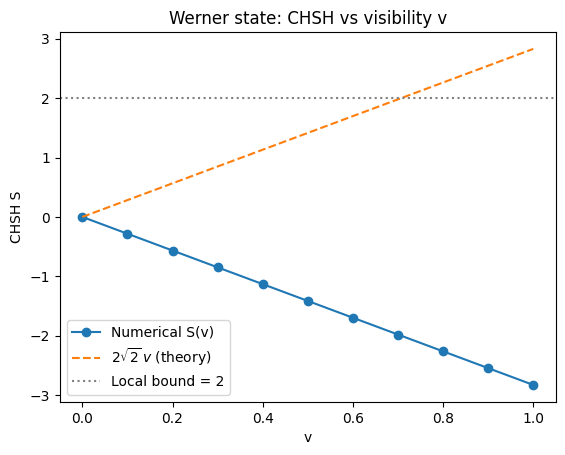

Violation disappears at v ≤ 0.7071067811865475 ≈ 0.7071067811865475


In [9]:
# Build Werner state and scan S vs v
psi_minus = bell_psi_minus()
rho_singlet = rho_pure(psi_minus)
I4 = np.eye(4, dtype=complex)

def werner(v):
    return v*rho_singlet + (1-v)*I4/4

# Singlet-optimal axes in some plane; use the x–z plane mapping
A0_s = rot_xz(0.0)           # z
A1_s = rot_xz(np.pi/2)       # x
B0_s = rot_xz(np.pi/4)       # halfway toward x
B1_s = rot_xz(-np.pi/4)      # halfway toward -x

vs = np.linspace(0, 1, 11)
Ss = []
for v in vs:
    rho_v = werner(v)
    S_v = CHSH_S(rho_v, A0_s, A1_s, B0_s, B1_s)
    Ss.append(np.real_if_close(S_v))

Ss = np.array(Ss, dtype=float)

for v, S_v in zip(vs, Ss):
    print(f"v={v:0.2f}  S≈{S_v:0.4f}   (2√2 v≈{2*np.sqrt(2)*v:0.4f})")

# Optional: quick plot
import matplotlib.pyplot as plt

plt.figure()
plt.plot(vs, Ss, 'o-', label='Numerical S(v)')
plt.plot(vs, 2*np.sqrt(2)*vs, '--', label=r'$2\sqrt{2}\,v$ (theory)')
plt.axhline(2, color='gray', linestyle=':', label='Local bound = 2')
plt.xlabel('v')
plt.ylabel('CHSH S')
plt.legend()
plt.title('Werner state: CHSH vs visibility v')
plt.show()

v_threshold = 2/(2*np.sqrt(2))  # when S=2
print("Violation disappears at v ≤", v_threshold, "≈", float(v_threshold))


### Exercise 3: No-signalling check
Confirm that $P(r=+1|\mathbf a)=1/2$ independent of Bob’s choice.


In [11]:
def random_bloch(n_samples=1, plane=None):
    """
    Sample random unit Bloch vectors.
    plane=None -> uniform on sphere
    plane='xz' -> random angle in x–z plane
    """
    if plane == 'xz':
        thetas = rng.uniform(0, 2*np.pi, size=n_samples)
        vecs = np.stack([np.sin(thetas), np.zeros(n_samples), np.cos(thetas)], axis=1)
        return vecs
    # Uniform on sphere
    u = rng.uniform(-1, 1, size=n_samples)
    phi = rng.uniform(0, 2*np.pi, size=n_samples)
    x = np.sqrt(1-u**2)*np.cos(phi)
    y = np.sqrt(1-u**2)*np.sin(phi)
    z = u
    return np.stack([x,y,z], axis=1)

def P_A_plus(rho, a_vec):
    """P(r=+1 | a) = Tr[(Π+^A ⊗ I) rho]."""
    Pi_plus = proj(a_vec, +1)
    M = kron(Pi_plus, I2)
    return float(np.real_if_close(np.trace(M @ rho)))

# Test for singlet
rho = rho_singlet
a_vec = rot_xz(0.37)  # any fixed Alice axis

B_samples = random_bloch(n_samples=200, plane=None)
Ps = []
for b_vec in B_samples:
    # Note: Bob's choice does not enter marginal; we include it to emphasize independence.
    Ps.append(P_A_plus(rho, a_vec))

Ps = np.array(Ps)
print("Mean P_A(r=+1) over many Bob settings ≈", Ps.mean())
print("Std. dev. over Bob settings ≈", Ps.std())

# Repeat for a noisy Werner state (still no-signalling)
rho = werner(0.6)
Ps2 = [P_A_plus(rho, a_vec) for _ in range(200)]
print("Werner(v=0.6): Mean P_A(r=+1) ≈", np.mean(Ps2), " Std ≈", np.std(Ps2))


Mean P_A(r=+1) over many Bob settings ≈ 0.49999999999999994
Std. dev. over Bob settings ≈ 1.1102230246251565e-16
Werner(v=0.6): Mean P_A(r=+1) ≈ 0.49999999999999994  Std ≈ 1.1102230246251565e-16


In [6]:
# Bonus: Exercise 2 helper — CHSH on Werner state by sampling
# We sample (with prob v) from singlet joint probs, else from uniform noise.
def sample_joint_werner(a_theta, b_theta, v=1.0, shots=20_000):
    a, b = unit(a_theta), unit(b_theta)
    c = np.dot(a,b)
    # singlet joint probs
    Ps = 0.25*np.array([1 - (+1)*(+1)*c,
                        1 - (+1)*(-1)*c,
                        1 - (-1)*(+1)*c,
                        1 - (-1)*(-1)*c])
    Ps = np.clip(Ps,0,1); Ps = Ps/np.sum(Ps)
    # white noise joint probs
    Pw = np.full(4, 0.25)
    P  = v*Ps + (1-v)*Pw
    outcomes = np.array([[+1,+1],[+1,-1],[-1,+1],[-1,-1]])
    idx = rng.choice(4, size=shots, p=P)
    rs = outcomes[idx]
    r, s = rs[:,0], rs[:,1]
    return np.mean(r*s)

def estimate_CHSH_werner(v=1.0, shots=50_000):
    E00 = sample_joint_werner(A0,B0,v,shots)
    E01 = sample_joint_werner(A0,B1,v,shots)
    E10 = sample_joint_werner(A1,B0,v,shots)
    E11 = sample_joint_werner(A1,B1,v,shots)
    S = E00 + E01 + E10 - E11
    return S

for v in [1.0, 0.9, 0.8, 0.75, 0.707, 0.6]:
    Sh = estimate_CHSH_werner(v, shots=100_000)
    print(f"v={v:0.3f}  S≈{Sh:0.4f}  (2√2·v≈{(2*np.sqrt(2)*v):0.4f})")


v=1.000  S≈-2.8263  (2√2·v≈2.8284)
v=0.900  S≈-2.5541  (2√2·v≈2.5456)
v=0.800  S≈-2.2590  (2√2·v≈2.2627)
v=0.750  S≈-2.1236  (2√2·v≈2.1213)
v=0.707  S≈-1.9931  (2√2·v≈1.9997)
v=0.600  S≈-1.7042  (2√2·v≈1.6971)


## What to look for
- **Exercise 1:** The printed `S(|Φ+⟩)` should be very close to $$2\sqrt{2}\approx 2.828.$$
- **Exercise 2:** The table and plot should track $$S(v)\approx 2\sqrt{2}\,v$$, with violation lost near $$v=1/\sqrt{2}\approx 0.707.$$
- **Exercise 3:** The reported means should be $$\approx 0.5$$ with tiny fluctuation, independent of Bob’s choices — **no signalling**.


## 7. Reflection

Working through these exercises deepened the intuition behind **Bell inequalities** and what makes them so striking:

- **Different Bell states:**  
  The fact that $|\Phi^+\rangle$ also reaches the Tsirelson bound shows that maximal entanglement, not just the singlet, underpins the violation.  
  Choice of axes (here in the $x\!-\!z$ plane) is essential to reveal the non-classical correlations.

- **Visibility & noise:**  
  Adding white noise smoothly degrades the CHSH value, and the clean scaling $S \approx 2\sqrt{2}v$ highlights how fragile violations are.  
  The critical threshold $v = 1/\sqrt{2}$ ($\approx 0.707$) marks the border where quantum advantage disappears.

- **No-signalling principle:**  
  Even with strong correlations, Alice’s marginal outcomes remain perfectly random.  
  This uniformity is what prevents faster-than-light signalling, preserving consistency with relativity.

---

### Key Insight
Entanglement gives correlations that **defy local realism** but still **respect relativistic causality**.  
Noise and measurement choice reveal both the power and the limits of these quantum resources.


---
### Links
- **Open in Colab (from GitHub):** replace `YOUR_GITHUB_USERNAME/qucode-21days`
  - `https://colab.research.google.com/github/YOUR_GITHUB_USERNAME/qucode-21days/blob/main/Day11_Deutsch-Jozsa_Algorithm.ipynb.ipynb`
- **Report an issue / suggest a fix:** link to your repo issues page
